In [2]:
# ------------------ BLOQUE: INICIAR SERVIDOR RAPHTORY Y ACCEDER AL GRAFO ------------------
from raphtory.graphql import GraphServer
import time

# Lanza el servidor GraphQL en la carpeta donde guardaste el grafo
server = GraphServer(work_dir="graphs/").start()
client = server.get_client()



print("🚀 Servidor GraphQL de Raphtory en marcha.")
print("Accede desde tu navegador a: http://localhost:1736")

# El nombre/path de tu grafo es: kiali_fullnode_graph-3
# En la UI GraphQL puedes hacer queries, explorar nodos, aristas y ver todas las propiedades cargadas.


🚀 Servidor GraphQL de Raphtory en marcha.
Accede desde tu navegador a: http://localhost:1736


In [3]:
import pandas as pd
from raphtory import Graph
import os
import shutil

# Cargar dataset
csv_path = "./results/final2_modified_sorted.csv"
df = pd.read_csv(csv_path, parse_dates=["timestamp"])

# Crear grafo
g = Graph()

# Nombre del grafo y ruta
graph_name = "microservices_creation_graph"
output_path = f"graphs/{graph_name}"
if os.path.exists(output_path):
    shutil.rmtree(output_path)
os.makedirs("graphs", exist_ok=True)

# Obtener el primer timestamp en que aparece cada microservicio
first_appearances = df.sort_values("timestamp").groupby("Microservice").first().reset_index()

# Crear nodos con marca temporal y conexión al pod
for _, row in first_appearances.iterrows():
    ts = int(row["timestamp"].timestamp() * 1000)
    ms = row["Microservice"]
    pod = row["pod"]
    abnormal_class = row["Abnormality class"]

    label = "anomalous" if abnormal_class != 1 else "normal"
    color = "red" if label == "anomalous" else "green"

    g.add_node(ts, ms, node_type="Microservice", properties={
        "label": label,
        "ui_color": color
    })

    g.add_node(ts, pod, node_type="Pod")

    g.add_edge(ts, ms, pod, properties={
        "relationship": "deployed_to",
        "label": "connects"
    })

# Guardar grafo
g.save_to_file(output_path)
print("\u2705 Grafo de creación de microservicios guardado en:", output_path)


FileNotFoundError: [Errno 2] No such file or directory: './results/final2_modified_sorted.csv'

In [ ]:
 # ------------------ BLOQUE: VER COLUMNAS ------------------
import pandas as pd

# Cargar el CSV
df = pd.read_csv('./results/kiali_kpi_metrics_processed.csv')
print(df.columns)

In [ ]:
!pip install pyvis

In [ ]:
import pandas as pd
from raphtory import Graph
import os
import shutil

# Cargar CSV principal
df = pd.read_csv('./results/kiali_kpi_metrics_processed.csv', parse_dates=["timestamp"])

# Crear grafo
g = Graph()

# Nombre del grafo y ruta
graph_name = "microservices_graph_enriched"
output_path = f"graphs/{graph_name}"
if os.path.exists(output_path):
    shutil.rmtree(output_path)
os.makedirs("graphs", exist_ok=True)

# Crear nodos y aristas con propiedades temporales
for _, row in df.iterrows():
    ts = int(row["timestamp"].timestamp() * 1000)
    src = row["source_workload"]
    dst = row["destination_workload"]
    abnormal_class = row["Abnormality class"]

    # Etiqueta y color del nodo
    label = "normal" if abnormal_class == 1 else "anomalous"
    color = "green" if abnormal_class == 1 else "red"

    # Propiedades comunes de nodos
    common_props = {
        "success_rate": row["success_rate"],
        "error_rate": row["error_rate"],
        "request_rate": row["request_rate"],
        "throughput": row["throughput"],
        "success_count": row["success_count"],
        "error_count": row["error_count"],
        "Abnormality_class": abnormal_class,
        "time_window": row["time_window"],
        "ui_color": color
    }

    # Añadir nodos
    g.add_node(ts, src, properties=common_props, node_type="Microservice")
    g.add_node(ts, dst, properties=common_props, node_type="Microservice")

    # Etiqueta y color del edge
    edge_label = "normal_link" if abnormal_class == 1 else "anomalous_link"
    edge_color = "green" if abnormal_class == 1 else "red"

    # Arista con props visuales y métricas
    edge_props = {
        "average_latency": row["average_latency"],
        "total_request": row["total_request"],
        "new_request": row["new_request"],
        "istio_request_bytes": row["istio_request_bytes"],
        "Abnormality_class": abnormal_class,
        "link_color": row.get("link_color", edge_color),  # se prioriza la columna si existe
        "relationship": "communicates",
        "label": edge_label,
        "ui_color": edge_color
    }

    g.add_edge(ts, src, dst, properties=edge_props)

# Guardar grafo
g.save_to_file(output_path)
print("✅ Grafo completo con nodos y enlaces etiquetados y coloreados guardado en:", output_path)


✅ Grafo completo con nodos y enlaces etiquetados y coloreados guardado en: graphs/microservices_graph_enriched


In [ ]:
import pandas as pd
from raphtory import Graph
import os
import shutil

# Cargar CSV principal
df = pd.read_csv('./results/kiali_kpi_metrics_processed.csv', parse_dates=["timestamp"])

# Crear grafo
g = Graph()

# Nombre del grafo y ruta
graph_name = "microservices_graph_enriched"
output_path = f"graphs/{graph_name}"
if os.path.exists(output_path):
    shutil.rmtree(output_path)
os.makedirs("graphs", exist_ok=True)

# Crear nodos y aristas con propiedades temporales
added_edges = set()

for _, row in df.iterrows():
    ts = int(row["timestamp"].timestamp() * 1000)
    src = row["source_workload"]
    dst = row["destination_workload"]
    abnormal_class = row["Abnormality class"]

    # Etiqueta y color del nodo
    label = "normal" if abnormal_class == 1 else "anomalous"
    color = "green" if abnormal_class == 1 else "red"

    # Propiedades comunes de nodos
    common_props = {
        "success_rate": row["success_rate"],
        "error_rate": row["error_rate"],
        "request_rate": row["request_rate"],
        "throughput": row["throughput"],
        "success_count": row["success_count"],
        "error_count": row["error_count"],
        "Abnormality_class": abnormal_class,
        "time_window": row["time_window"],
        "ui_color": color
    }

    # Añadir nodos
    g.add_node(ts, src, properties=common_props, node_type="Microservice")
    g.add_node(ts, dst, properties=common_props, node_type="Microservice")

    # Arista con props visuales y métricas
    edge_id = (src, dst)
    edge_label = "normal_link" if abnormal_class == 1 else "anomalous_link"
    edge_color = "green" if abnormal_class == 1 else "red"

    if edge_id not in added_edges:
        g.add_edge(ts, src, dst, properties={
            "relationship": "communicates",
            "label": edge_label,
            "ui_color": edge_color
        })
        added_edges.add(edge_id)

    # Añadir propiedades temporales con add_updates
    g.edge(src, dst).add_updates(ts, properties={
        "average_latency": row["average_latency"],
        "total_request": row["total_request"],
        "new_request": row["new_request"],
        "istio_request_bytes": row["istio_request_bytes"],
        "Abnormality_class": abnormal_class,
        "link_color": row.get("link_color", edge_color)
    })

# Guardar grafo
g.save_to_file(output_path)
print("\u2705 Grafo completo con nodos y enlaces etiquetados y coloreados guardado en:", output_path)


✅ Grafo completo con nodos y enlaces etiquetados y coloreados guardado en: graphs/microservices_graph_enriched


In [ ]:
from raphtory import Graph
from datetime import datetime

# Cargar el grafo desde archivo
g = Graph.load_from_file("graphs/microservices_graph_enriched")

# Nodo a consultar
node_name = "checkoutservice"
node = g.node(node_name)

print(f"[TOTAL] {node_name} conectó con {node.degree()} nodos.")

# Consulta temporal: antes de cierto instante
cutoff = datetime.strptime("2025-04-16 17:33:00", "%Y-%m-%d %H:%M:%S")
node_before = g.before(cutoff).node(node_name)
print(f"[ANTES de {cutoff}] conectó con {node_before.degree()} nodos.")

# Consulta temporal: entre dos tiempos específicos
start = datetime.strptime("2025-04-16 17:31:00", "%Y-%m-%d %H:%M:%S")
end = datetime.strptime("2025-04-16 17:34:00", "%Y-%m-%d %H:%M:%S")
node_window = g.node(node_name).window(start, end)
print(f"[VENTANA entre {start} y {end}] conectó con {node_window.degree()} nodos.")

# Evolución temporal de latencia entre frontend y checkoutservice
graph_edge = g.edge("frontend", "checkoutservice")
print("\nEvolución de latencia entre 'frontend' y 'checkoutservice':")

for update in graph_edge.history():
    time = datetime.fromtimestamp(update / 1000)  # Convert milliseconds to seconds and then to datetime
    latency = graph_edge.properties["average_latency"] if "average_latency" in graph_edge.properties else "N/A"
    print(f"{time}: {latency} ms")


[TOTAL] checkoutservice conectó con 7 nodos.
[ANTES de 2025-04-16 17:33:00] conectó con 7 nodos.
[VENTANA entre 2025-04-16 17:31:00 y 2025-04-16 17:34:00] conectó con 7 nodos.

Evolución de latencia entre 'frontend' y 'checkoutservice':
2025-04-16 19:30:00: 859.2533913699232 ms
2025-04-16 19:30:00: 859.2533913699232 ms
2025-04-16 19:30:00: 859.2533913699232 ms
2025-04-16 19:30:00: 859.2533913699232 ms
2025-04-16 19:30:00: 859.2533913699232 ms
2025-04-16 19:30:00: 859.2533913699232 ms
2025-04-16 19:30:15: 859.2533913699232 ms
2025-04-16 19:30:30: 859.2533913699232 ms
2025-04-16 19:30:30: 859.2533913699232 ms
2025-04-16 19:30:45: 859.2533913699232 ms
2025-04-16 19:31:00: 859.2533913699232 ms
2025-04-16 19:31:00: 859.2533913699232 ms
2025-04-16 19:31:00: 859.2533913699232 ms
2025-04-16 19:31:15: 859.2533913699232 ms
2025-04-16 19:31:30: 859.2533913699232 ms
2025-04-16 19:31:30: 859.2533913699232 ms
2025-04-16 19:31:45: 859.2533913699232 ms
2025-04-16 19:32:00: 859.2533913699232 ms
2025-04

In [ ]:
import pandas as pd
from raphtory import Graph
import os
import shutil

# Cargar CSV
df = pd.read_csv('./results/kiali_kpi_metrics_processed.csv', parse_dates=["timestamp"])

# Crear grafo
g = Graph()

# Definir nombre y ruta
graph_name = "microservices_graph_enriched"
output_path = f"graphs/{graph_name}"
if os.path.exists(output_path):
    shutil.rmtree(output_path)
os.makedirs("graphs", exist_ok=True)

# Crear nodos y aristas
added_nodes = set()

for _, row in df.iterrows():
    ts = int(row["timestamp"].timestamp() * 1000)
    src = row["source_workload"]
    dst = row["destination_workload"]
    abnormal_class = row["Abnormality class"]

    # Clasificación semántica
    is_anomalous = str(abnormal_class).lower() == "anomalous"
    node_type = "anomalous" if is_anomalous else "normal"

    # Propiedades TEMPORALES
    temporal_props = {
        "success_rate": row["success_rate"],
        "error_rate": row["error_rate"],
        "request_rate": row["request_rate"],
        "throughput": row["throughput"],
        "success_count": row["success_count"],
        "error_count": row["error_count"],
        "Abnormality_class": abnormal_class,
        "time_window": row["time_window"]
    }

    # Añadir nodos solo si no están
    if src not in added_nodes:
        g.add_node(ts, src, properties=temporal_props, node_type=node_type)
        added_nodes.add(src)
    if dst not in added_nodes:
        g.add_node(ts, dst, properties=temporal_props, node_type=node_type)
        added_nodes.add(dst)

    # Etiqueta visual de la arista
    edge_label = "anomalous_link" if is_anomalous else "normal_link"
    edge_color = "red" if is_anomalous else "green"

    # Propiedades de la arista
    edge_props = {
        "average_latency": row["average_latency"],
        "total_request": row["total_request"],
        "new_request": row["new_request"],
        "istio_request_bytes": row["istio_request_bytes"],
        "Abnormality_class": abnormal_class,
        "relationship": "communicates",
        "label": edge_label
    }

    g.add_edge(ts, src, dst, properties=edge_props)

# Guardar el grafo en disco
g.save_to_file(output_path)

print("\u2705 Grafo guardado en:", output_path)


✅ Grafo guardado en: graphs/microservices_graph_enriched


In [ ]:
from raphtory import Graph

# Cargar grafo
g = Graph.load_from_file("graphs/microservices_graph_enriched")

print("\nEvolución de latencia (average_latency) por bloques de 3 minutos:")
for w in g.edge("frontend", "checkoutservice").rolling(window="15 seconds"):
    updates = w.history()
    latencias = [u.average_latency for u in updates if hasattr(u, "average_latency") and u.average_latency is not None]
    if latencias:
        media = sum(latencias) / len(latencias)
        print(f"{w.start_date_time} → {w.end_date_time}: Latencia media = {media:.2f} ms")



Evolución de latencia (average_latency) por bloques de 3 minutos:


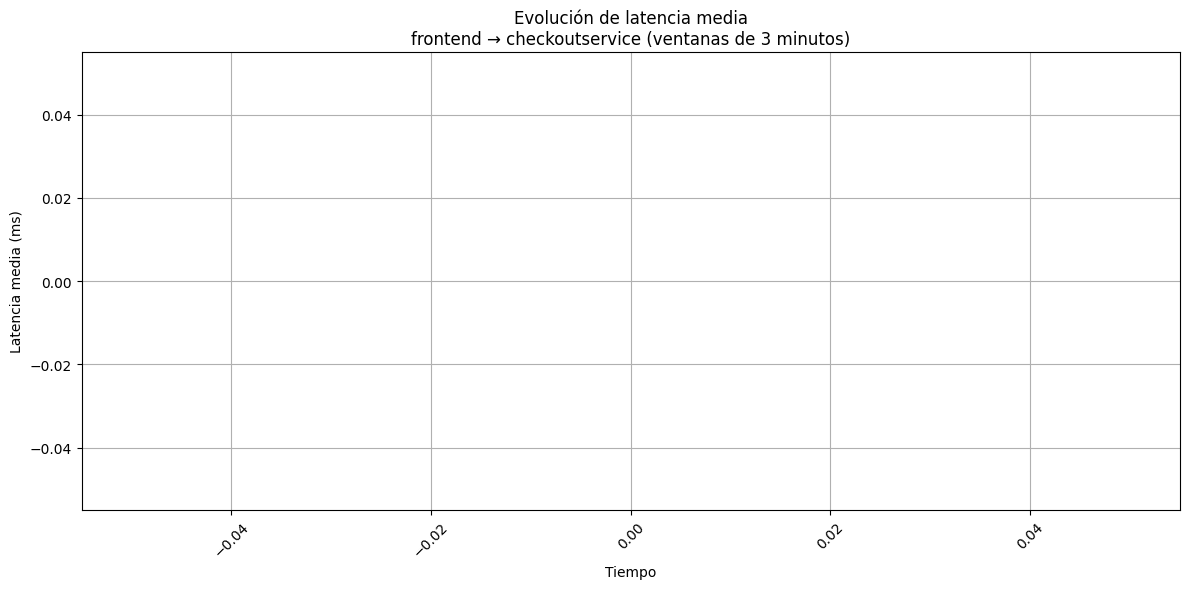

In [ ]:
from raphtory import Graph
import matplotlib.pyplot as plt

# Cargar el grafo previamente guardado
g = Graph.load_from_file("graphs/microservices_graph_enriched_3")

# Inicializar listas para fechas y latencias
fechas = []
latencias_media = []

# Rolling window de 3 minutos
for w in g.edge("frontend", "checkoutservice").rolling(window="3 minutes"):
    updates = w.history()
    latencias = [u.average_latency for u in updates if hasattr(u, "average_latency") and u.average_latency is not None]
    if latencias:
        media = sum(latencias) / len(latencias)
        fechas.append(w.start_date_time)
        latencias_media.append(media)

# Graficar con matplotlib
plt.figure(figsize=(12, 6))
plt.plot(fechas, latencias_media, marker="o", linestyle="-")
plt.xlabel("Tiempo")
plt.ylabel("Latencia media (ms)")
plt.title("Evolución de latencia media\nfrontend → checkoutservice (ventanas de 3 minutos)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from raphtory import Graph
import os
import shutil

# Cargar CSV
df = pd.read_csv('./results/kiali_kpi_metrics_processed.csv', parse_dates=["timestamp"])

# Crear grafo
g = Graph()

# Definir nombre y ruta
graph_name = "microservices_graph_enriched_3"
output_path = f"graphs/{graph_name}"
if os.path.exists(output_path):
    shutil.rmtree(output_path)
os.makedirs("graphs", exist_ok=True)

# Crear nodos y aristas
added_nodes = set()

for _, row in df.iterrows():
    ts = int(row["timestamp"].timestamp() * 1000)
    src = row["source_workload"]
    dst = row["destination_workload"]
    abnormal_class = row["Abnormality class"]

    # Clasificación semántica
    is_anomalous = str(abnormal_class).lower() == "anomalous"
    node_type = "anomalous" if is_anomalous else "normal"

    # Propiedades TEMPORALES
    temporal_props = {
        "success_rate": row["success_rate"],
        "error_rate": row["error_rate"],
        "request_rate": row["request_rate"],
        "throughput": row["throughput"],
        "success_count": row["success_count"],
        "error_count": row["error_count"],
        "Abnormality_class": abnormal_class,
        "time_window": row["time_window"]
    }

    # Añadir nodos solo si no están
    if src not in added_nodes:
        g.add_node(ts, src, properties=temporal_props, node_type=node_type)
        added_nodes.add(src)
    if dst not in added_nodes:
        g.add_node(ts, dst, properties=temporal_props, node_type=node_type)
        added_nodes.add(dst)

    # Etiqueta visual de la arista
    edge_label = "anomalous_link" if is_anomalous else "normal_link"
    edge_color = "red" if is_anomalous else "green"

    # Propiedades de la arista
    edge_props = {
        "average_latency": row["average_latency"],
        "total_request": row["total_request"],
        "new_request": row["new_request"],
        "istio_request_bytes": row["istio_request_bytes"],
        "Abnormality_class": abnormal_class,
        "relationship": "communicates",
        "label": edge_label
    }

    g.add_edge(ts, src, dst, properties=edge_props)

# Guardar el grafo en disco
g.save_to_file(output_path)

print("\u2705 Grafo guardado en:", output_path)


✅ Grafo guardado en: graphs/microservices_graph_enriched_3


In [ ]:
!pip install raphtory[visualisation]

In [ ]:
!pip install "raphtory[all]" --upgrade


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\marti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [ ]:
from pyvis.network import Network
import pandas as pd

# Cargar CSV
df = pd.read_csv('./results/kiali_kpi_metrics_processed.csv')

# Crear red visual
net = Network(height="750px", width="100%", directed=True, notebook=False, cdn_resources="in_line")
net.barnes_hut()  # Mejora la dispersión

# Usar sets para evitar duplicados
added_nodes = set()

for _, row in df.iterrows():
    src = row["source_workload"]
    dst = row["destination_workload"]
    # Convert 'Abnormality class' to an integer or map string values to integers
    abnormal_mapping = {"Normal": 1, "Anomalous": 2}  # Example mapping
    abnormal = abnormal_mapping.get(row["Abnormality class"], 0)  # Default to 0 if not found
    color = "green" if abnormal == 1 else "red"

    # Añadir nodos solo si no han sido agregados
    if src not in added_nodes:
        net.add_node(src, label=src, color=color, shape="dot", title=f"Abnormality class: {abnormal}")
        added_nodes.add(src)
    if dst not in added_nodes:
        net.add_node(dst, label=dst, color=color, shape="dot", title=f"Abnormality class: {abnormal}")
        added_nodes.add(dst)

    # Añadir arista con información
    net.add_edge(
        src, dst,
        label="⚠️" if abnormal > 1 else "✔️",
        title=f"Latency: {row['average_latency']}, Requests: {row['total_request']}",
        color=color
    )

# Exportar grafo con encoding explícito
with open("grafo_microservicios.html", "w", encoding="utf-8") as f:
    f.write(net.generate_html())

print("✅ Grafo generado correctamente. Abre 'grafo_microservicios.html'")


✅ Grafo generado correctamente. Abre 'grafo_microservicios.html'


In [ ]:
import pandas as pd
from raphtory import Graph
from pyvis.network import Network
import os
import shutil

# Cargar CSV
df = pd.read_csv('./results/kiali_kpi_metrics_processed.csv', parse_dates=["timestamp"])

# Crear grafo
g = Graph()

# Definir nombre y ruta
graph_name = "microservices_graph_enriched_4"
output_path = f"graphs/{graph_name}"
if os.path.exists(output_path):
    shutil.rmtree(output_path)
os.makedirs("graphs", exist_ok=True)

# Crear nodos y aristas
added_nodes = set()

for _, row in df.iterrows():
    ts = int(row["timestamp"].timestamp() * 1000)
    src = row["source_workload"]
    dst = row["destination_workload"]
    abnormal_class = row["Abnormality class"]

    is_anomalous = str(abnormal_class).lower() == "anomalous"
    node_type = "anomalous" if is_anomalous else "normal"

    temporal_props = {
        "success_rate": row["success_rate"],
        "error_rate": row["error_rate"],
        "request_rate": row["request_rate"],
        "throughput": row["throughput"],
        "success_count": row["success_count"],
        "error_count": row["error_count"],
        "Abnormality_class": abnormal_class,
        "time_window": row["time_window"]
    }

    if src not in added_nodes:
        g.add_node(ts, src, properties=temporal_props, node_type=node_type)
        added_nodes.add(src)
    if dst not in added_nodes:
        g.add_node(ts, dst, properties=temporal_props, node_type=node_type)
        added_nodes.add(dst)

    edge_label = "anomalous_link" if is_anomalous else "normal_link"
    edge_color = "red" if is_anomalous else "green"

    edge_props = {
        "average_latency": row["average_latency"],
        "total_request": row["total_request"],
        "new_request": row["new_request"],
        "istio_request_bytes": row["istio_request_bytes"],
        "Abnormality_class": abnormal_class,
        "relationship": "communicates",
        "label": edge_label
    }

    g.add_edge(ts, src, dst, properties=edge_props)

# Guardar grafo
g.save_to_file(output_path)
print("\u2705 Grafo guardado en:", output_path)

# Crear visualización con PyVis estilo limpio, una sola arista por par
net = Network(height="750px", width="100%", directed=True, notebook=False, cdn_resources="in_line")
net.force_atlas_2based()

# Añadir nodos únicos
nodos = set(df["source_workload"]).union(set(df["destination_workload"]))
for node in nodos:
    net.add_node(node, label=node, shape="ellipse", color="lightblue")

# Construir aristas agregadas por frecuencia de anomalías
enlaces = df.groupby(["source_workload", "destination_workload"])
for (src, dst), group in enlaces:
    anom_count = sum(str(v).lower() == "anomalous" for v in group["Abnormality class"])
    total = len(group)
    color = "red" if anom_count > total / 2 else "green"
    title = f"Anomalías: {anom_count}/{total}"
    net.add_edge(src, dst, color=color, title=title)


with open("grafo_microservicios_pyvis-1.html", "w", encoding="utf-8") as f:
    f.write(net.generate_html())


✅ Grafo guardado en: graphs/microservices_graph_enriched_4


# Abre una terminal en la carpeta del archivo
cd /ruta/del/archivo
python -m http.server 8000
http://localhost:8000/grafo_microservicios.html

In [ ]:
from pyvis.network import Network

# Crear red visual solo con nodos y enlaces anómalos
net = Network(height="750px", width="100%", directed=True, notebook=False, cdn_resources="in_line")
net.barnes_hut()
anomalous_df = pd.read_csv('./Nodos_An_malos.csv')

# Añadir nodos y aristas únicos
added_nodes = set()
for _, row in anomalous_df.iterrows():
    src = row["source_workload"]
    dst = row["destination_workload"]
    color = "red"
    label = "anomalous"

    if src not in added_nodes:
        net.add_node(src, label=src, color=color, shape="dot", title="Anomalous Node")
        added_nodes.add(src)
    if dst not in added_nodes:
        net.add_node(dst, label=dst, color=color, shape="dot", title="Anomalous Node")
        added_nodes.add(dst)

    net.add_edge(
        src, dst,
        label=label,
        title=f"Latency: {row['average_latency']}, Error rate: {row['error_rate']}",
        color=color
    )

# Guardar como archivo HTML
output_path = "grafo_anomalous_only.html"
with open(output_path, "w", encoding="utf-8") as f:
    f.write(net.generate_html())

output_path



'grafo_anomalous_only.html'